In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split#, RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("combined.csv",header=0)
df.head()

,batch_date,test_name,swab_type,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,...,sob_severity,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat,covid19_test_results
0,10/20/2020,"SARS-CoV-2, NAA",Nasal,39,False,NaN,False,False,False,False,...,NaN,False,False,False,False,False,False,False,False,Negative
1,10/20/2020,COVID-19 PCR External Result,Nasal,56,False,NaN,False,False,False,False,...,NaN,False,False,False,False,False,False,False,False,Negative
2,10/20/2020,Rapid COVID-19 PCR Test,Nasal,35,False,NaN,False,False,False,False,...,NaN,False,False,False,False,False,False,False,False,Negative
3,10/20/2020,Rapid COVID-19 PCR Test,Nasal,37,False,NaN,False,False,False,False,...,NaN,False,False,False,False,False,False,False,False,Negative
4,10/20/2020,Rapid COVID-19 PCR Test,Nasal,42,False,NaN,False,False,False,False,...,NaN,False,False,False,False,False,False,False,False,Negative


In [3]:
df.describe()

,age,temperature,pulse,sys,dia,rr,sats,days_since_symptom_onset
count,2312.000000,1305.000000,1319.000000,1284.000000,1284.000000,1159.000000,1311.000000,749.000000
mean,37.496107,36.899157,80.959818,124.475078,79.453271,14.965487,98.143402,4.702270
std,14.989394,0.363557,13.530353,16.303536,9.652666,2.057595,1.439635,7.146164
min,0.000000,35.800000,49.000000,88.000000,41.000000,10.000000,87.000000,1.000000
25%,27.000000,36.700000,72.000000,113.000000,73.000000,14.000000,97.000000,2.000000
50%,35.000000,36.850000,80.000000,123.000000,79.000000,16.000000,98.000000,3.000000
75%,48.250000,37.100000,89.000000,134.000000,85.000000,16.000000,99.000000,5.000000
max,83.000000,39.200000,140.000000,210.000000,130.000000,26.000000,100.000000,120.000000


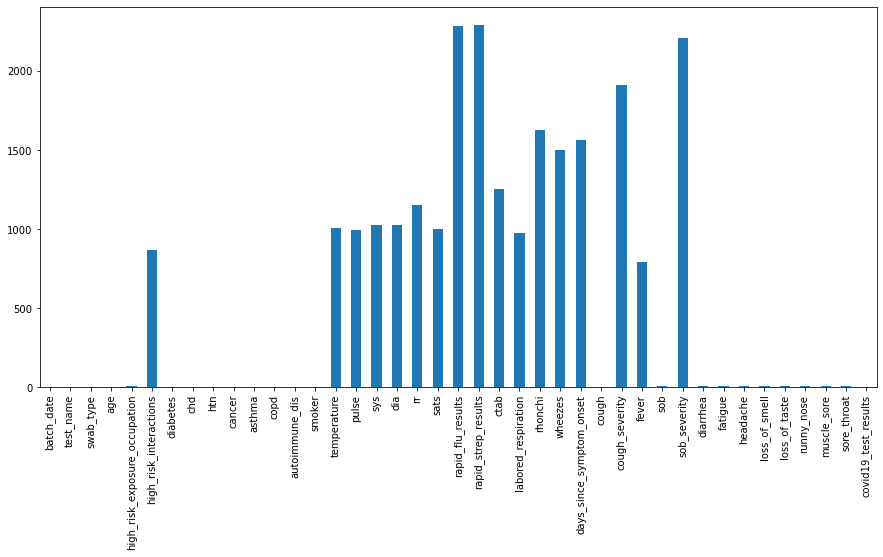

In [4]:
df.isnull().sum().plot(kind = 'bar', figsize = (15,7))

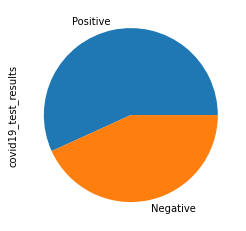

In [5]:
df['covid19_test_results'].value_counts().plot(kind = 'pie')

In [6]:
df['rapid_flu_results'] = df['rapid_flu_results'].astype('|S')
df['rapid_strep_results'] = df['rapid_strep_results'].astype('|S')
df['cough_severity'] = df['cough_severity'].astype('|S')
df['sob_severity'] = df['sob_severity'].astype('|S')

In [7]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['test_name']= label_encoder.fit_transform(df['test_name'])
df['swab_type']= label_encoder.fit_transform(df['swab_type'])
df['covid19_test_results']= label_encoder.fit_transform(df['covid19_test_results']) 
df['diabetes']=label_encoder.fit_transform(df['diabetes']) 
df['chd']=label_encoder.fit_transform(df['chd']) 
df['rapid_flu_results']=label_encoder.fit_transform(df['rapid_flu_results'])
df['rapid_strep_results']=label_encoder.fit_transform(df['rapid_strep_results'])
df['cough_severity']=label_encoder.fit_transform(df['cough_severity'])
df['sob_severity']=label_encoder.fit_transform(df['sob_severity'])

In [8]:
df['high_risk_exposure_occupation'].fillna(int(df['high_risk_exposure_occupation'].mean()), inplace=True)
df['high_risk_interactions'].fillna(int(df['high_risk_interactions'].mean()), inplace=True)
df['temperature'].fillna(int(df['temperature'].mean()), inplace=True)
df['pulse'].fillna(int(df['pulse'].mean()), inplace=True)
df['sys'].fillna(int(df['sys'].mean()), inplace=True)
df['dia'].fillna(int(df['dia'].mean()), inplace=True)
df['rr'].fillna(int(df['rr'].mean()), inplace=True)
df['sats'].fillna(int(df['sats'].mean()), inplace=True)
df['ctab'].fillna(int(df['ctab'].mean()), inplace=True)
df['labored_respiration'].fillna(int(df['labored_respiration'].mean()), inplace=True)
df['rhonchi'].fillna(int(df['rhonchi'].mean()), inplace=True)
df['wheezes'].fillna(int(df['wheezes'].mean()), inplace=True)
df['days_since_symptom_onset'].fillna(int(df['days_since_symptom_onset'].mean()), inplace=True)
df['fever'].fillna(int(df['fever'].mean()), inplace=True)
df['sob'].fillna(int(df['sob'].mean()), inplace=True)        
df['diarrhea'].fillna(int(df['diarrhea'].mean()), inplace=True)        
df['fatigue'].fillna(int(df['fatigue'].mean()), inplace=True)        
df['headache'].fillna(int(df['headache'].mean()), inplace=True)        
df['loss_of_smell'].fillna(int(df['loss_of_smell'].mean()), inplace=True)        
df['loss_of_taste'].fillna(int(df['loss_of_taste'].mean()), inplace=True)        
df['runny_nose'].fillna(int(df['runny_nose'].mean()), inplace=True) 
df['muscle_sore'].fillna(int(df['muscle_sore'].mean()), inplace=True) 
df['sore_throat'].fillna(int(df['sore_throat'].mean()), inplace=True)                                 
df.isnull().sum()

batch_date                       0
test_name                        0
swab_type                        0
age                              0
high_risk_exposure_occupation    0
high_risk_interactions           0
diabetes                         0
chd                              0
htn                              0
cancer                           0
asthma                           0
copd                             0
autoimmune_dis                   0
smoker                           0
temperature                      0
pulse                            0
sys                              0
dia                              0
rr                               0
sats                             0
rapid_flu_results                0
rapid_strep_results              0
ctab                             0
labored_respiration              0
rhonchi                          0
wheezes                          0
days_since_symptom_onset         0
cough                            0
cough_severity      

In [9]:
# Sort the dataframe by date column
df = df.sort_values(by="age", key=pd.to_datetime)

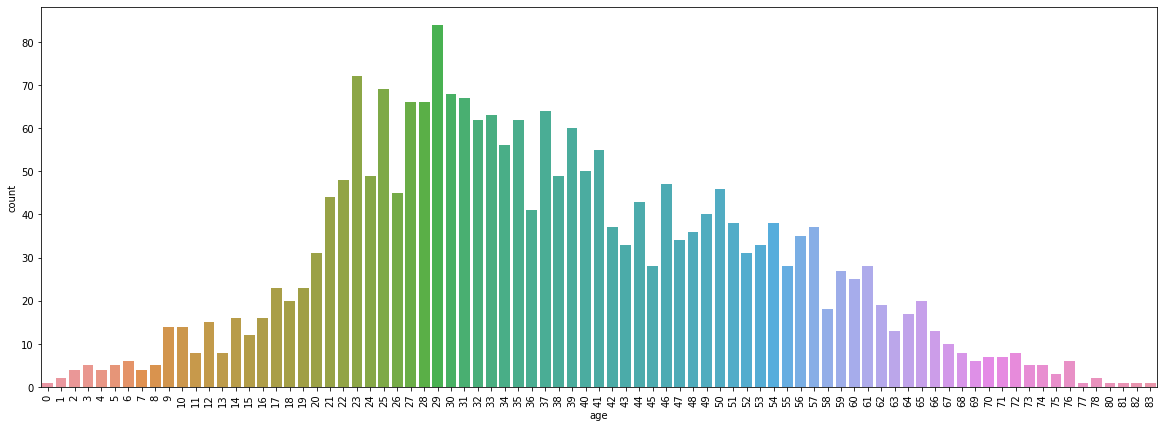

In [10]:
# Display the count Plot of the Company Products 
fig, ax  = plt.subplots(figsize=(20,7))
ax=sns.countplot(x='age', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

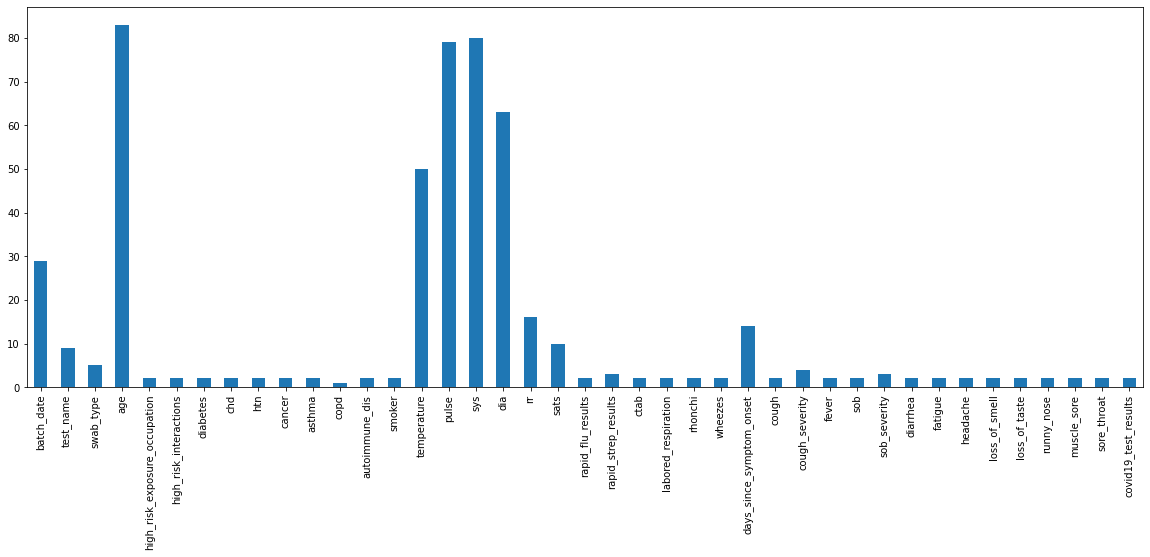

In [11]:
# Number of unqie values in each column 
df.nunique().plot(kind = 'bar', figsize=(20,7))

In [12]:
len(df.columns)

41

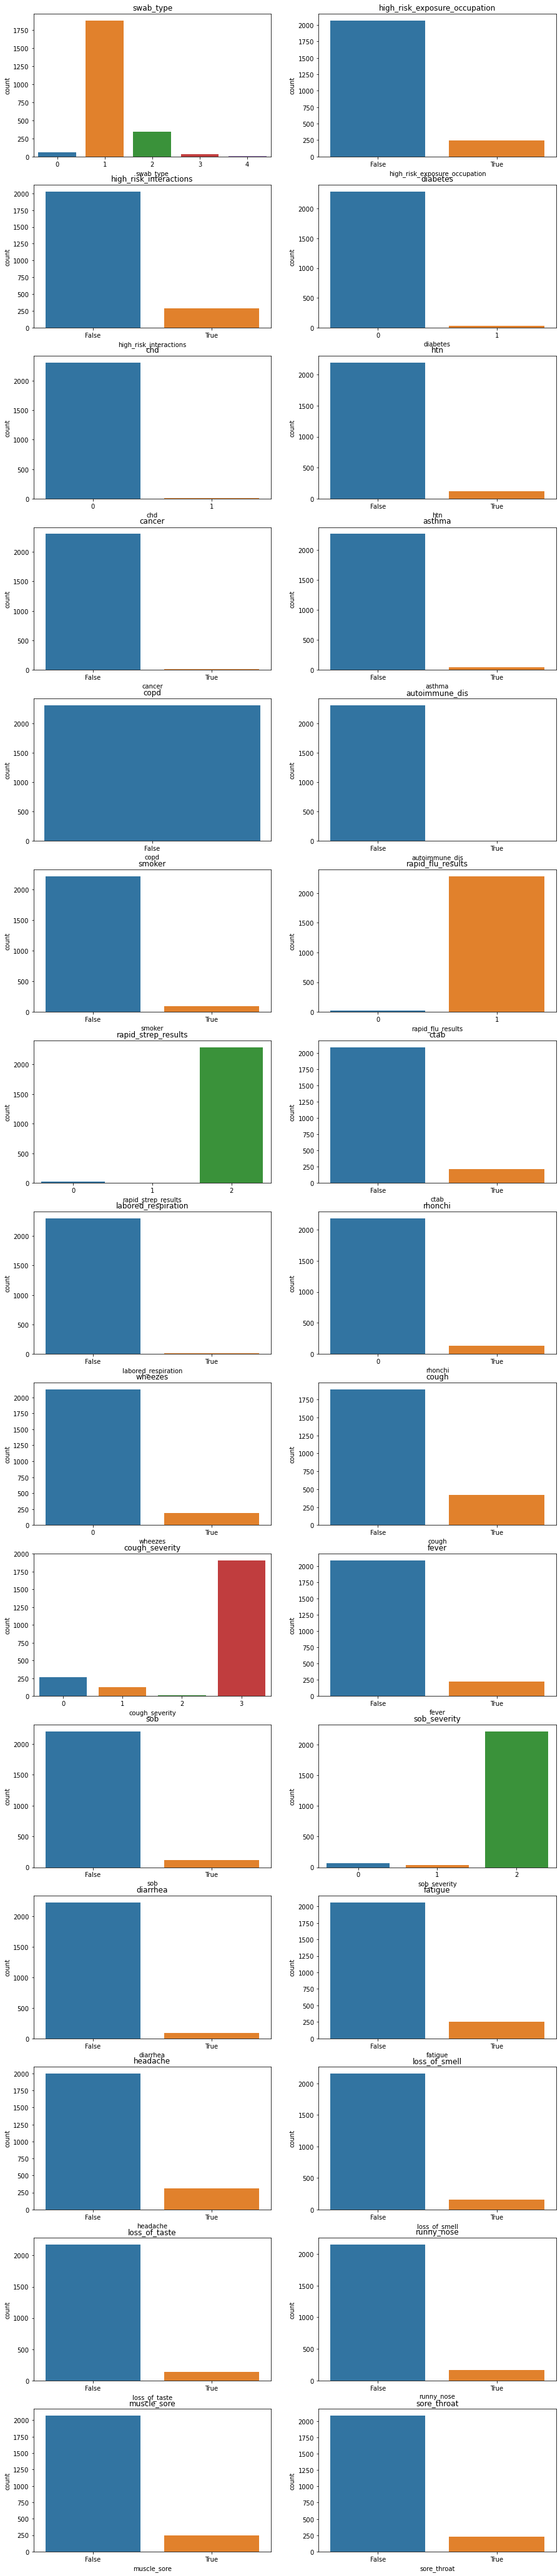

In [13]:
# Boolean (0/1) indicating whether the competitor’s video game [x] sold more on average in this region than in the other regions; the value –1 
plt.figure(figsize = (15,100))
for n, col in enumerate(['swab_type',
                         'high_risk_exposure_occupation', 'high_risk_interactions', 'diabetes',
                         'chd', 'htn', 'cancer', 'asthma', 'copd', 'autoimmune_dis', 'smoker',
                         'rapid_flu_results', 'rapid_strep_results', 'ctab', 'labored_respiration', 'rhonchi',
                         'wheezes', 'cough', 'cough_severity',
                         'fever', 'sob', 'sob_severity', 'diarrhea', 'fatigue', 'headache',
                         'loss_of_smell', 'loss_of_taste', 'runny_nose', 'muscle_sore','sore_throat']):
    plt.subplot(20,2,n + 1)
    plt.title(col)
    ax = sns.countplot(x=col, data=df)
    ax.set_xticklabels(ax.get_xticklabels());

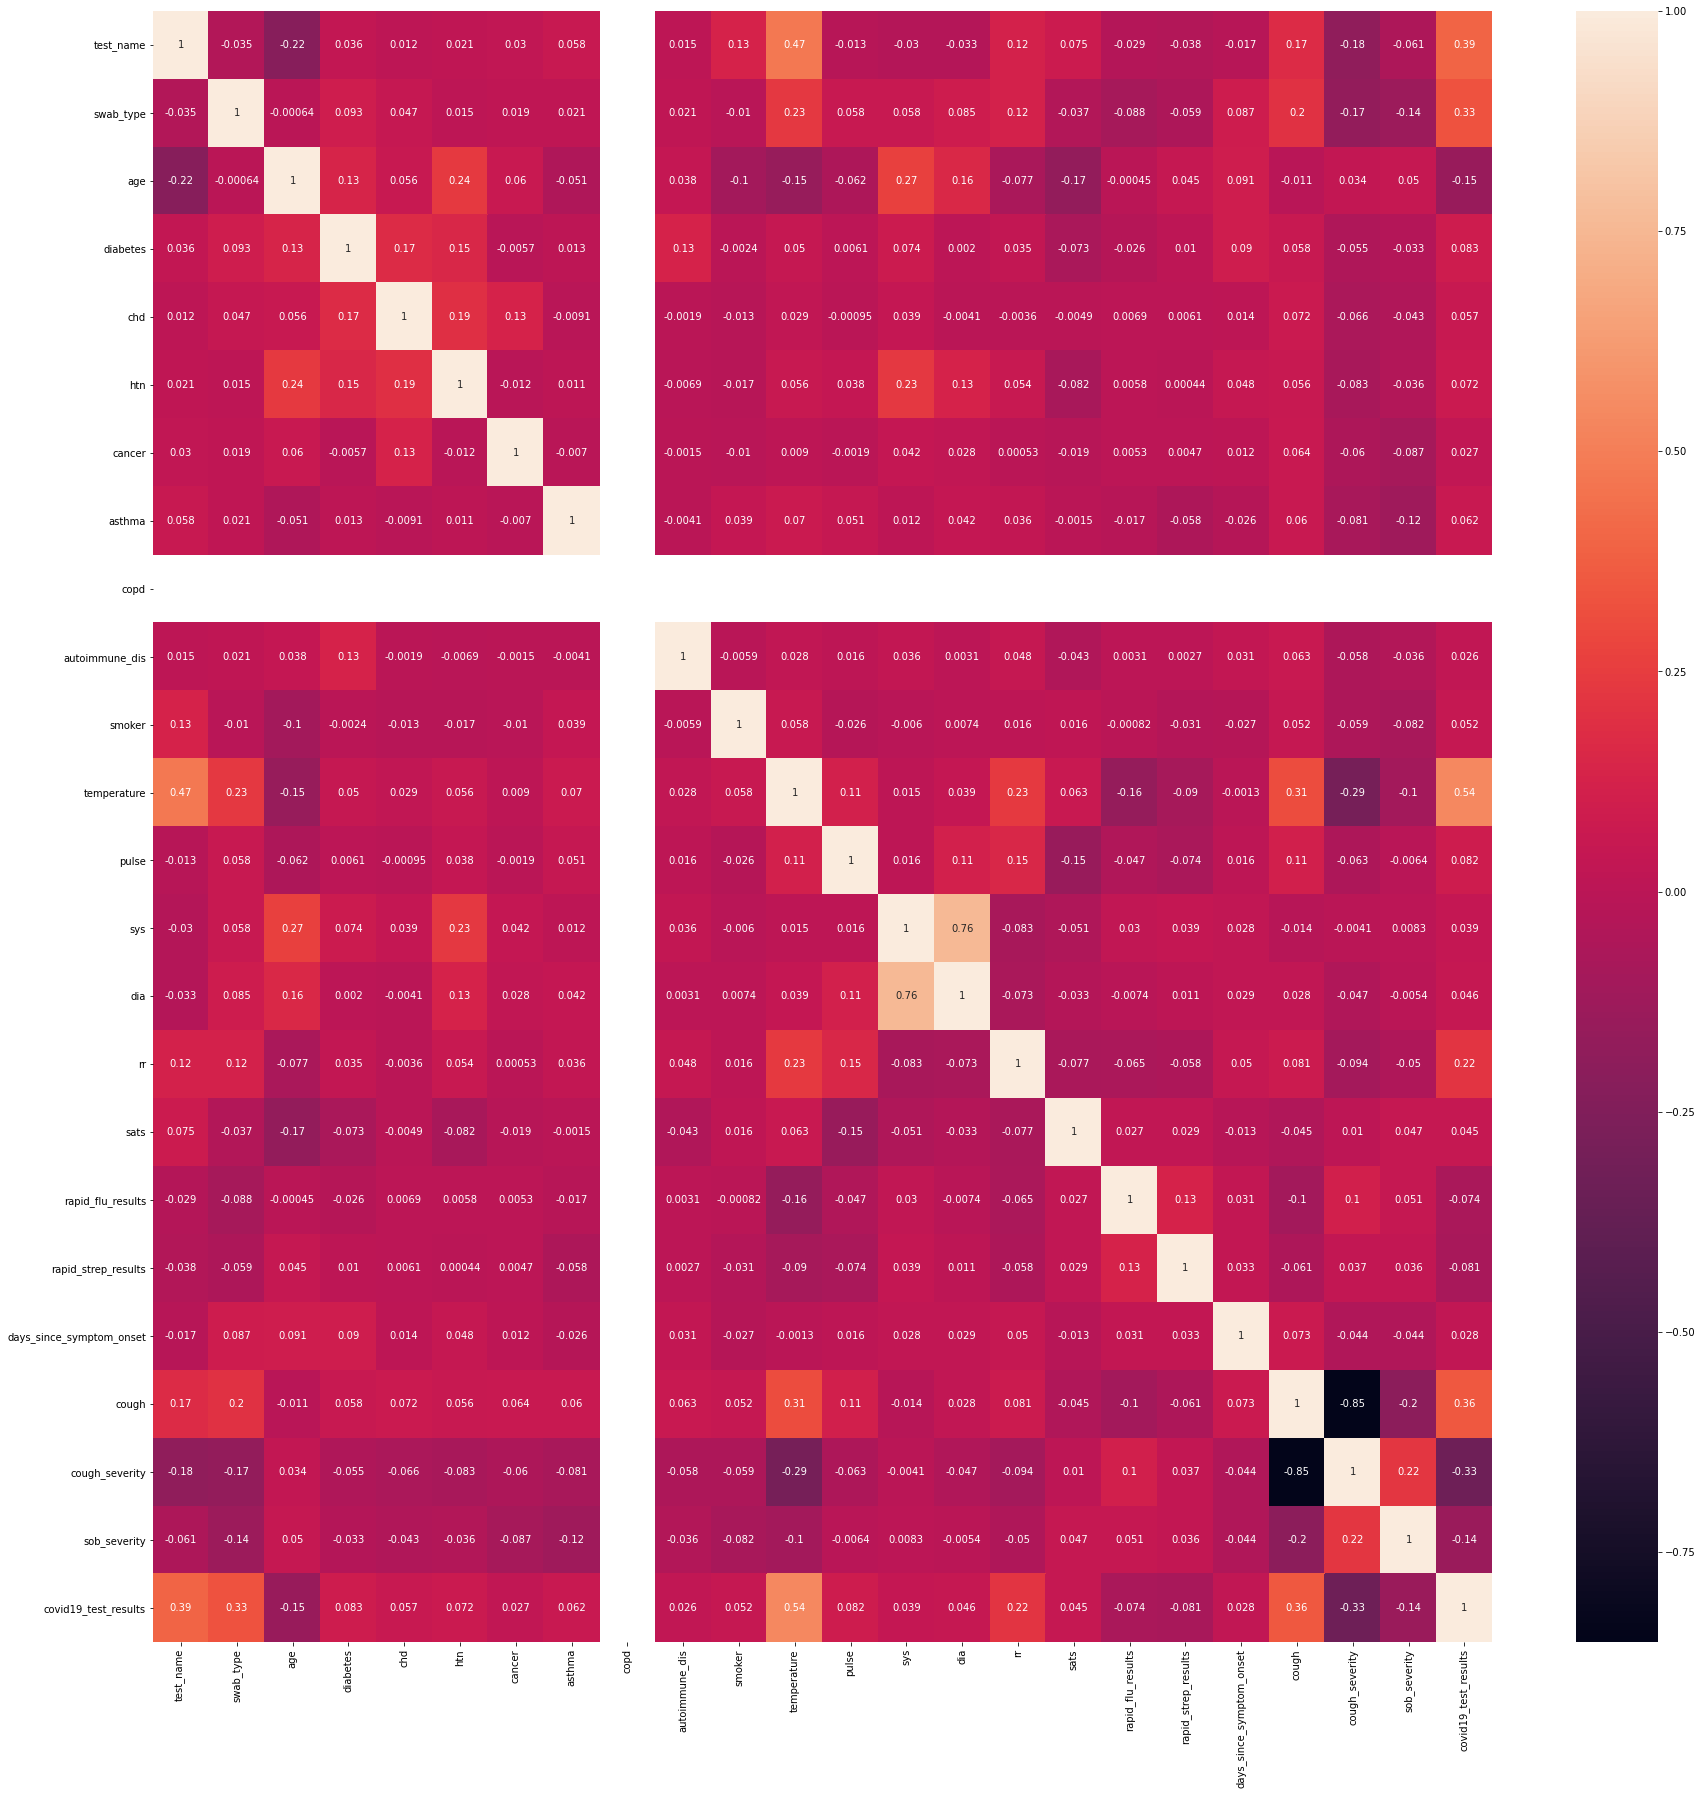

In [14]:
# Showing the Correlational of the dataset
plt.figure(figsize = (30,30))
sns.heatmap(df.corr(),annot=True)

In [15]:
# input variable
X = df.drop(['covid19_test_results','batch_date'], axis = 1) 
X.head(6)

,test_name,swab_type,age,high_risk_exposure_occupation,high_risk_interactions,diabetes,chd,htn,cancer,asthma,...,sob,sob_severity,diarrhea,fatigue,headache,loss_of_smell,loss_of_taste,runny_nose,muscle_sore,sore_throat
2282,8,1,0,False,False,0,0,False,False,False,...,False,2,True,False,False,False,False,False,False,False
657,8,1,1,False,False,0,0,False,False,False,...,False,2,False,False,False,False,False,False,False,False
1672,8,1,1,False,0,0,0,False,False,False,...,False,2,False,False,False,False,False,False,False,False
1822,8,1,2,False,False,0,0,False,False,False,...,False,2,False,False,False,False,False,True,False,False
2149,8,1,2,False,True,0,0,False,False,False,...,False,2,False,False,False,False,False,False,False,False
2259,8,1,2,False,False,0,0,False,False,False,...,False,2,False,False,False,False,False,False,False,False


In [16]:
y = df['covid19_test_results'] 
y.head(6)

2282    1
657     0
1672    1
1822    1
2149    1
2259    1
Name: covid19_test_results, dtype: int32

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [19]:
select_feature = SelectKBest(chi2, k=15).fit(X_train, y_train)

In [20]:
print(select_feature)

SelectKBest(k=15, score_func=<function chi2 at 0x000001D43D51E168>)


In [21]:
dfscores=pd.DataFrame(select_feature.scores_)
dfcolumns=pd.DataFrame(X.columns)
featurescores=pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns=['Features','Scores']

In [22]:
# Score of all Feature the more score the more imp is our feature
featurescores

,Features,Scores
0,test_name,382.901310
1,swab_type,37.013596
2,age,199.314408
3,high_risk_exposure_occupation,61.802257
4,high_risk_interactions,21.932798
5,diabetes,9.045705
6,chd,5.351145
7,htn,6.701170
8,cancer,0.547044
9,asthma,5.426121


In [23]:
# feature selection with Univariate Selection + Taking 20 top important features
featurescores.nlargest(20,'Scores')

,Features,Scores
0,test_name,382.901310
2,age,199.314408
26,cough,174.407335
33,headache,114.941970
37,muscle_sore,105.090273
28,fever,104.032722
32,fatigue,85.169082
34,loss_of_smell,79.502726
27,cough_severity,73.459352
35,loss_of_taste,69.900656


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Accuracy is:  0.8155619596541787


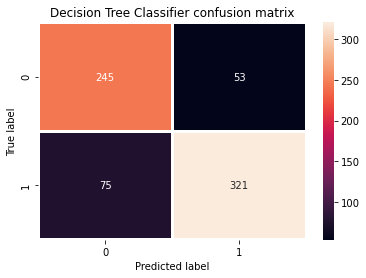

Report is 
 :               precision    recall  f1-score   support

           0       0.77      0.82      0.79       298
           1       0.86      0.81      0.83       396

    accuracy                           0.82       694
   macro avg       0.81      0.82      0.81       694
weighted avg       0.82      0.82      0.82       694



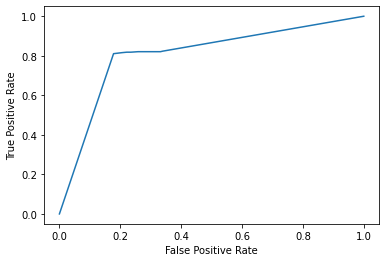

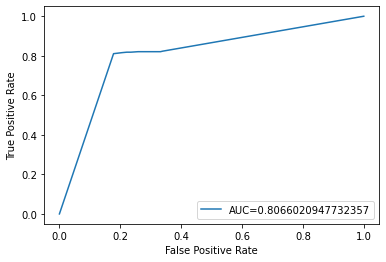

In [48]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,confusion_matrix,precision_score, recall_score
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)
ac = accuracy_score(y_test,dtree.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,dtree.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d",linewidths=2)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');
crp = classification_report(y_test, dtree.predict(X_test))
plt.show()
print('Report is \n :',crp)

predictions = dtree.predict(X_test)

dtr_results = [accuracy_score(y_test, predictions),
               precision_score(y_test, predictions, average='macro'),
               recall_score(y_test, predictions, average='macro'),
               f1_score(y_test, predictions, average='macro')]


y_pred_proba = dtree.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Accuracy is  0.6009049858187789


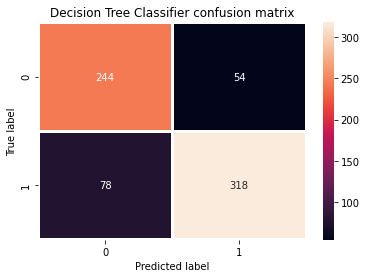

Report is 
 :               precision    recall  f1-score   support

           0       0.76      0.82      0.79       298
           1       0.85      0.80      0.83       396

    accuracy                           0.81       694
   macro avg       0.81      0.81      0.81       694
weighted avg       0.81      0.81      0.81       694



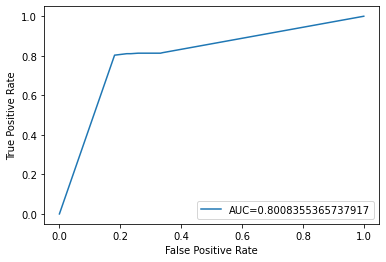

In [50]:
# Decision Tree Classifer With K Cross Fold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,confusion_matrix, precision_score, recall_score
from sklearn.metrics import accuracy_score,classification_report
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)
print("Accuracy is ",cross_val_score(dtree, X, y, cv=10, scoring ='accuracy').mean())
cm = confusion_matrix(y_test,dtree.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d",linewidths=2)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');
plt.show()
crp = classification_report(y_test,dtree.predict(X_test))
print('Report is \n :',crp)

predictions = dtree.predict(X_test)

dtr_k_results = [accuracy_score(y_test, predictions),
               precision_score(y_test, predictions, average='macro'),
               recall_score(y_test, predictions, average='macro'),
               f1_score(y_test, predictions, average='macro')]

y_pred_proba = dtree.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Accuracy is:  0.8472622478386167
Report is 
 :               precision    recall  f1-score   support

           0       0.86      0.77      0.81       298
           1       0.84      0.91      0.87       396

    accuracy                           0.85       694
   macro avg       0.85      0.84      0.84       694
weighted avg       0.85      0.85      0.85       694



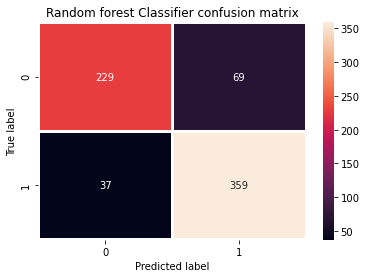

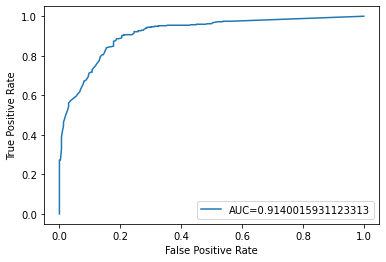

In [52]:
# Random forest Classifer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score,classification_report
clf_rf = RandomForestClassifier(random_state=101)      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d",linewidths=2)
plt.title('Random forest Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');
crp = classification_report(y_test,clf_rf.predict(X_test))
print('Report is \n :',crp)

predictions = clf_rf.predict(X_test)

rf_results = [accuracy_score(y_test, predictions),
               precision_score(y_test, predictions, average='macro'),
               recall_score(y_test, predictions, average='macro'),
               f1_score(y_test, predictions, average='macro')]
plt.show()
y_pred_proba = clf_rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Accuracy is  0.7086038961038961
Report is 
 :               precision    recall  f1-score   support

           0       0.86      0.77      0.81       298
           1       0.84      0.91      0.87       396

    accuracy                           0.85       694
   macro avg       0.85      0.84      0.84       694
weighted avg       0.85      0.85      0.85       694



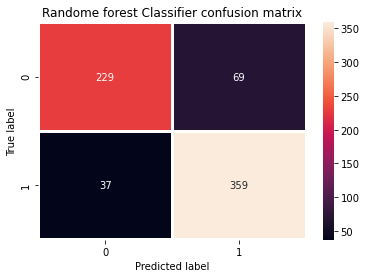

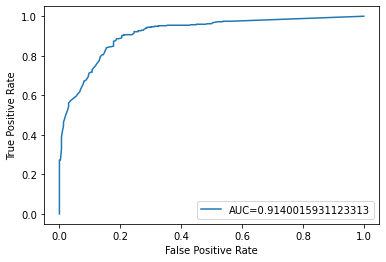

In [53]:
# Random Forest Classifer With K Cross Fold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score,classification_report

clf_rf = RandomForestClassifier(random_state=101)      
clf_rf = clf_rf.fit(X_train,y_train)
print("Accuracy is ",cross_val_score(clf_rf, X, y, cv=10, scoring ='accuracy').mean())
cm = confusion_matrix(y_test,clf_rf.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d",linewidths=2)
plt.title('Randome forest Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label');
crp = classification_report(y_test,clf_rf.predict(X_test))
print('Report is \n :',crp)

predictions = clf_rf.predict(X_test)

cf_k_results = [accuracy_score(y_test, predictions),
               precision_score(y_test, predictions, average='macro'),
               recall_score(y_test, predictions, average='macro'),
               f1_score(y_test, predictions, average='macro')]

plt.show()
y_pred_proba = clf_rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Accuracy: 0.776657060518732


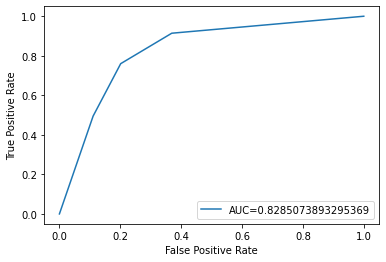

In [54]:
# knearest neighbors Classifier model with k neighbors 3
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

predictions = knn.predict(X_test)

knn_3_results = [accuracy_score(y_test, predictions),
               precision_score(y_test, predictions, average='macro'),
               recall_score(y_test, predictions, average='macro'),
               f1_score(y_test, predictions, average='macro')]

plt.show()
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Accuracy: 0.7853025936599424


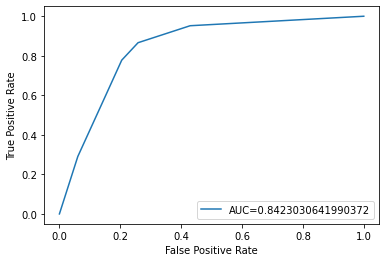

In [55]:
# knearest neighbors Classifier model with k neighbors 5
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

predictions = knn.predict(X_test)

knn_5_results = [accuracy_score(y_test, predictions),
               precision_score(y_test, predictions, average='macro'),
               recall_score(y_test, predictions, average='macro'),
               f1_score(y_test, predictions, average='macro')]

plt.show()
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Accuracy: 0.7881844380403458


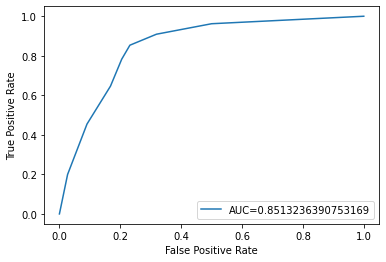

In [56]:
# knearest neighbors Classifier model with k neighbors 7
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

predictions = knn.predict(X_test)

knn_7_results = [accuracy_score(y_test, predictions),
                precision_score(y_test, predictions, average='macro'),
                recall_score(y_test, predictions, average='macro'),
                f1_score(y_test, predictions, average='macro')]

plt.show()
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Accuracy: 0.7838616714697406


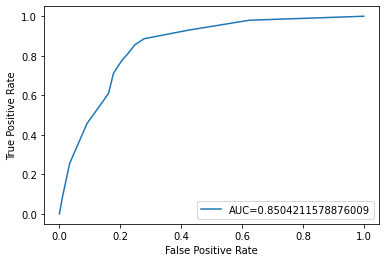

In [57]:
# knearest neighbors Classifier model with k neighbors 11
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=11)

#Train the model using the training sets
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

predictions = knn.predict(X_test)

knn_11_results = [accuracy_score(y_test, predictions),
               precision_score(y_test, predictions, average='macro'),
               recall_score(y_test, predictions, average='macro'),
               f1_score(y_test, predictions, average='macro')]

plt.show()
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Accuracy: 0.7853025936599424


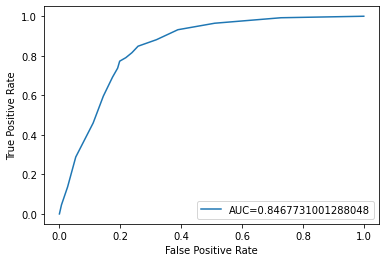

In [58]:
# knearest neighbors Classifier model with k neighbors 15
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=15)

#Train the model using the training sets
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

predictions = knn.predict(X_test)

knn_15_results = [accuracy_score(y_test, predictions),
                  precision_score(y_test, predictions, average='macro'),
                  recall_score(y_test, predictions, average='macro'),
                  f1_score(y_test, predictions, average='macro')]

plt.show()
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [61]:
# knearest neighbors Classifier with k fold cross validation
from sklearn.model_selection import cross_val_score
knnclassifier = KNeighborsClassifier(n_neighbors=5)
print("accuracy is",cross_val_score(knnclassifier, X, y, cv=10, scoring ='accuracy').mean())

accuracy is 0.6337289147633974


test accuracy: 0.6527377521613833


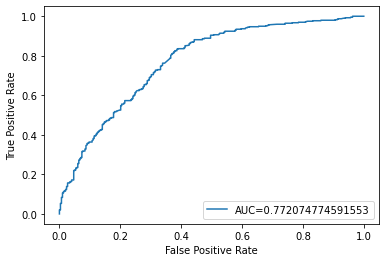

In [63]:
# SVM Implementation
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=101)
svm=SVC(random_state=101,probability=True)
svm.fit(X_train,y_train)
print("test accuracy:",svm.score(X_test,y_test))

predictions = svm.predict(X_test)

svm_results = [accuracy_score(y_test, predictions),
               precision_score(y_test, predictions, average='macro'),
               recall_score(y_test, predictions, average='macro'),
               f1_score(y_test, predictions, average='macro')]

y_pred_proba = svm.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

accuracy is 0.6821801761456933


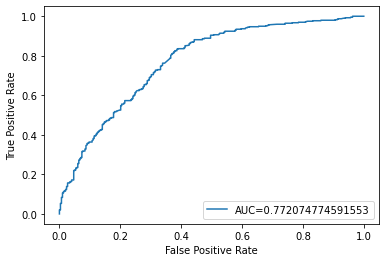

In [66]:
# SVM Implementation with k fold cross validation
from sklearn.model_selection import cross_val_score
svm=SVC(random_state=101,probability=True)
svm.fit(X_train,y_train)
print("accuracy is",cross_val_score(svm, X, y, cv=10, scoring ='accuracy').mean())

predictions = svm.predict(X_test)

svm_k_results = [accuracy_score(y_test, predictions),
               precision_score(y_test, predictions, average='macro'),
               recall_score(y_test, predictions, average='macro'),
               f1_score(y_test, predictions, average='macro')]

y_pred_proba = svm.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [66]:
from tabulate import tabulate
# showing all models result
dic = {
    'Metrics':['accuracy','precision','recall','f1-score'],
    'Decision tree' : dtr_results,
    'Decision tree Kfold' : dtr_k_results,
    'Random Forest' : rf_results,
    'Random Forest with kfold': cf_k_results,
    'KNN 3 Neighbous': knn_3_results,
    'KNN 5 Neighbous': knn_5_results,
    'KNN 7 Neighbous': knn_7_results,
    'KNN 11 Neighbous': knn_11_results,
    'KNN 15 Neighbous': knn_15_results,
    'SVM Results': svm_results,
    'SVM K Fold': svm_k_results
}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')
# displaying the DataFrame
metrics_df.T

Metrics,accuracy,precision,recall,f1-score
Decision tree,0.818444,0.814992,0.819733,0.816356
Decision tree Kfold,0.811239,0.807676,0.812174,0.809009
Random Forest,0.847262,0.849844,0.837511,0.841708
Random Forest with kfold,0.847262,0.849844,0.837511,0.841708
KNN 3 Neighbous,0.776657,0.774255,0.779379,0.774801
KNN 5 Neighbous,0.785303,0.781960,0.786540,0.783032
KNN 7 Neighbous,0.788184,0.784663,0.789065,0.785815
KNN 11 Neighbous,0.783862,0.780616,0.785277,0.781640
KNN 15 Neighbous,0.785303,0.782400,0.787370,0.783283
SVM Results,0.652738,0.731276,0.601451,0.565478


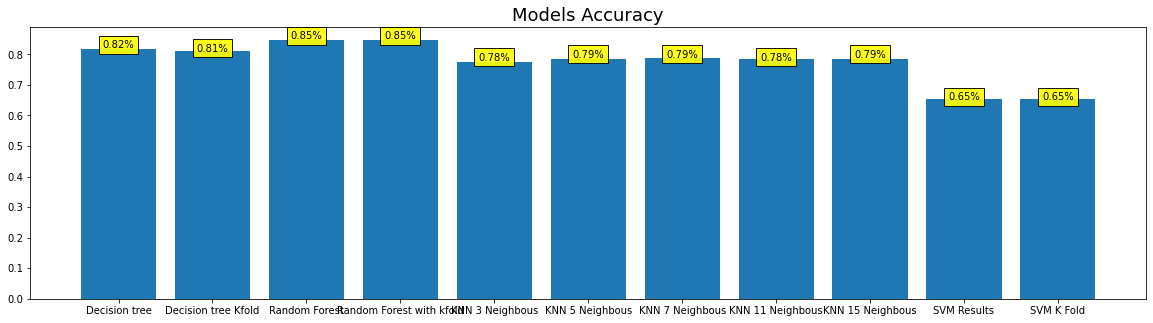

In [68]:
models_acc = metrics_df.iloc[0].tolist()
models_names = metrics_df.columns.tolist()
plt.figure(figsize=(20,5))
plt.bar(models_names,models_acc)
plt.title("Models Accuracy", fontsize=18)

def addLabels(names,acc):
    for i in range(len(names)):
        plt.text(i,round(acc[i],2),f"{round(acc[i],2)}%", ha = 'center', bbox=dict(facecolor='yellow', alpha=0.9))

addLabels(models_names,models_acc)
plt.show()